In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-in-csv/mnist_test.csv
/kaggle/input/mnist-in-csv/mnist_train.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [3]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [4]:
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False,parser='auto')
    mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
    sort_by_target(mnist) # fetch_openml() returns an unsorted dataset
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')

In [5]:
data=mnist["data"]
data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [6]:
target=mnist["target"]
target

array([0, 0, 0, ..., 9, 9, 9], dtype=int8)

**HERE IMAGES ARE 70000 AND EACH IMAGE HAS 784 COLUMNS SO EACH IMAGE IS(28*28)PIXELS and each column has one pixels intensity**

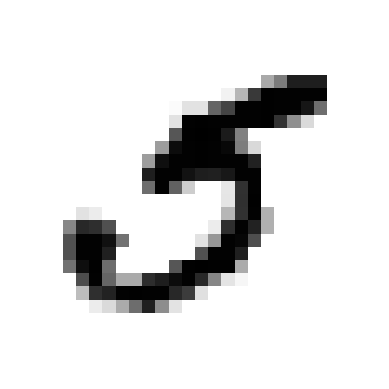

In [7]:
some_digit_array = data[36000]
#for square pixel we did 28X28 =784
reshape_array=some_digit_array.reshape((28,28))
img=plt.imshow(reshape_array,cmap = plt.cm.binary,interpolation="nearest")
plt.axis('off')
plt.savefig('num5')

In [8]:
target[36000]

5

**Before duing data analysis we need to split the data into train and test set**

In [9]:
data_train,data_test,target_train,target_test=data[:60000],data[60000:],target[:60000],target[60000:]

In [10]:
data_train.shape

(60000, 784)

In [11]:
data_test.shape

(10000, 784)

In [12]:
target_train

array([0, 0, 0, ..., 9, 9, 9], dtype=int8)

In [13]:
target_test

array([0, 0, 0, ..., 9, 9, 9], dtype=int8)

In [14]:
shuffle_index=np.random.permutation(60000)
data_train,target_train=data_train[shuffle_index],target_train[shuffle_index]

In [15]:
shuffle_index

array([15748,  7173,  4129, ...,  1721, 29346, 49105])

In [16]:
target_train_5=(target_train==5)
target_test_5=(target_test==5)

In [17]:
target_train_5

array([False, False, False, ..., False, False, False])

In [18]:
target_test_5

array([False, False, False, ..., False, False, False])

In [19]:
from sklearn.linear_model import SGDClassifier as SGD
sgd_clf_obj=SGD(random_state=42)
sgd_clf_obj.fit(data_train,target_train_5)
sgd_clf_obj.predict([some_digit_array])

array([False])

**Accuracy measurement**

**1.cross_validation**

In [20]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf_obj,data_train,target_train_5)

array([0.9625    , 0.95458333, 0.93858333, 0.96391667, 0.93108333])

**cv takes integer value and run cross_val_score that many times**

In [21]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf_obj,data_train,target_train_5,cv=3)

array([0.92565, 0.94565, 0.9665 ])

In [22]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf_obj,data_train,target_train_5,scoring="accuracy")

array([0.9625    , 0.95458333, 0.93858333, 0.96391667, 0.93108333])

In [23]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf_obj,data_train,target_train_5,cv=3,scoring="accuracy")

array([0.92565, 0.94565, 0.9665 ])

In [24]:
from sklearn.base import BaseEstimator
#inheretance 
class Never_5Classifier(BaseEstimator):
    def fit(self,data,y=None):
        pass
    def predict(self,data):
        return np.zeros((len(data),1),dtype=bool) 

In [25]:
 never_5=Never_5Classifier()

**for croos_val_score needed estimator, data and targetdata as parameters**

In [26]:
cross_val_score(never_5,data_train,target_train_5,cv=3,scoring="accuracy")

array([0.90945, 0.9103 , 0.9092 ])

**Confusion matrix is 2nd method to detect accuracy**

**a)in confusion matrix a matrix that count the number of a value which falls in class A are placed in classB confusely**

In [27]:
from sklearn.model_selection import cross_val_predict
target_train_pred=cross_val_predict(sgd_clf_obj,data_train,target_train_5,cv=3)

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target_train_5,target_train_pred)

array([[52131,  2448],
       [  796,  4625]])

In [29]:
target_train_prefect_pred=target_train_5

In [30]:
confusion_matrix(target_train_5,target_train_prefect_pred)

array([[54579,     0],
       [    0,  5421]])

In [31]:
from sklearn.metrics import precision_score,recall_score
precision=precision_score(target_train_5,target_train_pred)
recall=recall_score(target_train_5,target_train_pred)

In [32]:
precision

0.6538950940195108

In [33]:
4344 / (4344 + 1307)

0.7687135020350381

In [34]:
recall

0.8531636229477956

In [35]:
 4344 / (4344 + 1077)

0.801328168234643

**f1_score=precision+recall**

In [36]:
from sklearn.metrics import f1_score
f1=f1_score(target_train_5,target_train_pred)
f1

0.7403553705778774

In [37]:
target_scores = sgd_clf_obj.decision_function([some_digit_array])
target_scores

array([-651.0480532])

In [38]:
threshold=0
target_some_digit_array_pred=(target_scores>threshold)
target_some_digit_array_pred

array([False])

In [39]:
threshold=20000
target_some_digit_array_pred=(target_scores>threshold)
target_some_digit_array_pred

array([False])

In [40]:
target_scores=cross_val_predict(sgd_clf_obj,data_train,target_train_5,cv=3,method="decision_function")
target_scores

array([-29396.05803677,  -7893.8919379 ,  -6482.44876059, ...,
       -11091.44500889, -22345.34925017,  -5905.21683576])

In [41]:
target_scores.shape

(60000,)

In [42]:
if target_scores.ndim == 2:
    target_scores = target_scores[:, 1]

In [43]:
from sklearn.metrics import precision_recall_curve
precision,recall,threshold=precision_recall_curve(target_train_5,target_scores)

In [44]:
def precision_recall_plot(precision,recall,threshold):
    plt.plot(threshold,precision[:-1], "b--", label="Precision",linewidth=2)
    plt.plot(threshold,recall[:-1], "g-", label="recall",linewidth=2)
    plt.xlabel("Threshold",fontsize=16)
    plt.legend(loc="upper left",fontsize=16)
    plt.ylim([0, 1])

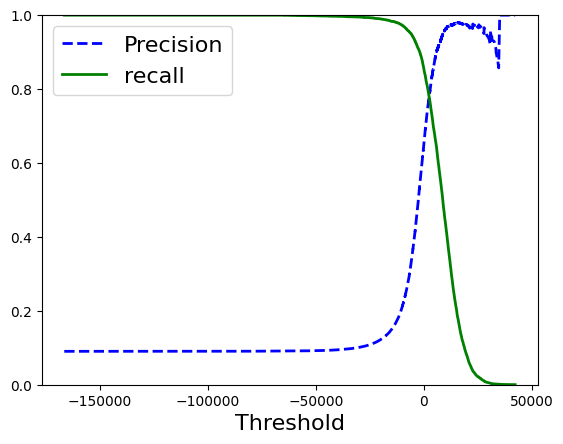

In [45]:
precision_recall_plot(precision,recall,threshold)

In [46]:
(target_train_pred == (target_scores > 0)).all()

True

In [47]:
target_train_pred_90=(target_scores>70000)
target_train_pred_90

array([False, False, False, ..., False, False, False])

In [48]:
precision_score(target_train_5,target_train_pred_90)

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [49]:
recall_score(target_train_5,target_train_pred_90)

0.0

In [50]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    

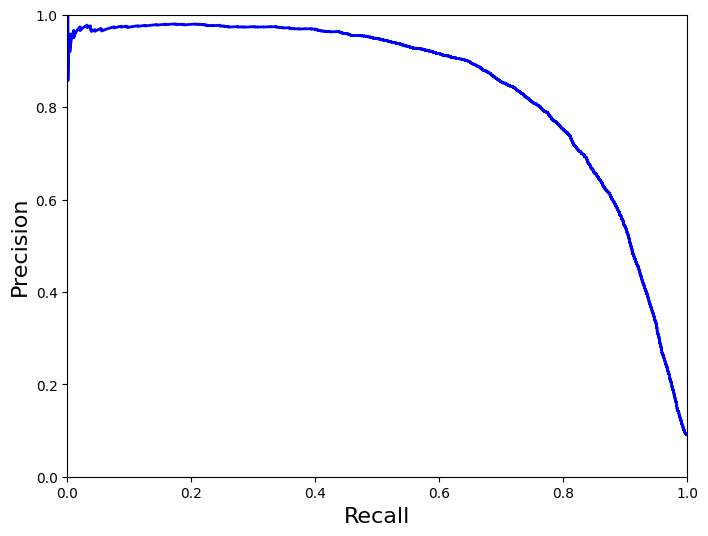

In [51]:
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precision,recall)
plt.savefig("precision_vs_recall_plot")
plt.show()

In [52]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(target_train_5, target_scores)

In [53]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

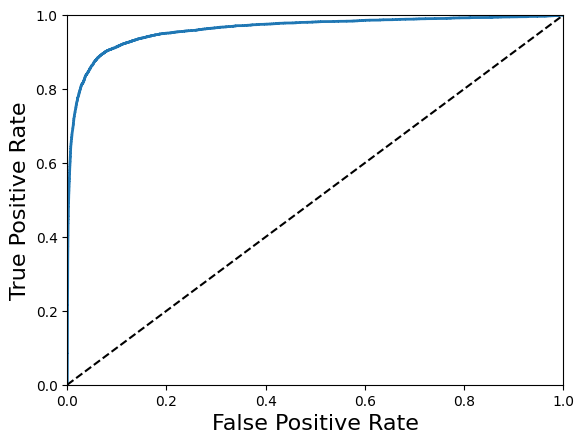

In [54]:
plot_roc_curve(fpr, tpr, label=None)

In [55]:
from sklearn.metrics import roc_auc_score

roc_auc_score(target_train_5, target_scores)

0.9620226308161072

In [56]:
from sklearn.ensemble import RandomForestClassifier as RFC
forest_clf_obj = RFC(n_estimators=10, random_state=42)
target_probas_forest = cross_val_predict(forest_clf_obj, data_train, target_train_5, cv=3,method="predict_proba")

In [57]:
target_scores_forest = target_probas_forest[:, 1]
# score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(target_train_5,target_scores_forest)

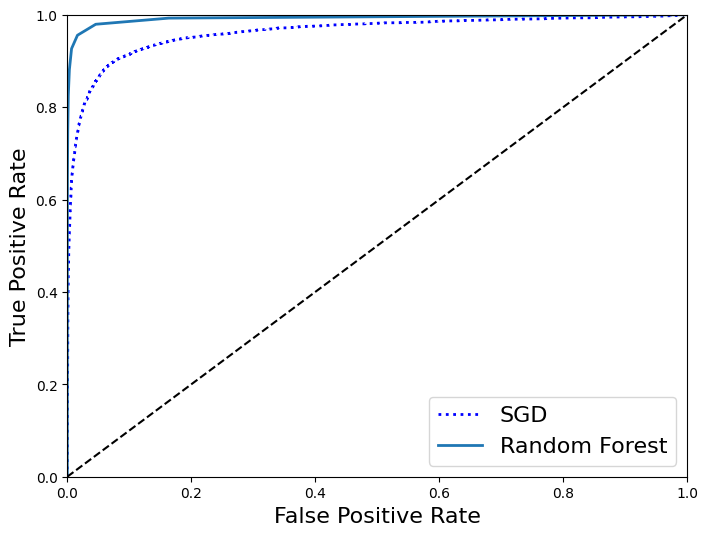

In [58]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
plt.savefig("roc_curve_comparison_plot")
plt.show()

In [59]:
roc_auc_score(target_train_5, target_scores_forest)

0.9926785047487254

In [60]:
target_train_pred_forest = cross_val_predict(forest_clf_obj, data_train, target_train_5, cv=3)
precision_score(target_train_5, target_train_pred_forest)

0.9802804557405784

In [61]:
recall_score(target_train_5, target_train_pred_forest)

0.8253089835823649

**Multiclass**

In [62]:
sgd_clf_obj.fit(data_train, target_train)
sgd_clf_obj.predict([some_digit_array])

array([5], dtype=int8)

In [63]:
some_digit_scores = sgd_clf_obj.decision_function([some_digit_array])
some_digit_scores

array([[ -5344.1874066 , -20065.44006081,  -9280.96092054,
         -6526.48612451, -16175.56967543,   1139.50819489,
        -21172.42022818, -14662.41441447, -12049.13451815,
        -14693.61169079]])

In [64]:
np.argmax(some_digit_scores)

5

In [65]:
sgd_clf_obj.classes_[5]

5

In [66]:
sgd_clf_obj.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [67]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import SGDClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(data_train, target_train)
ovo_clf.predict([some_digit_array])

array([5], dtype=int8)

In [68]:
len(ovo_clf.estimators_)

45

In [69]:
forest_clf_obj.fit(data_train, target_train)
forest_clf_obj.predict([some_digit_array])

array([5], dtype=int8)

In [70]:
forest_clf_obj.predict_proba([some_digit_array])

array([[0.2, 0. , 0. , 0. , 0. , 0.8, 0. , 0. , 0. , 0. ]])

In [71]:
cross_val_score(sgd_clf_obj, data_train, target_train, cv=3, scoring="accuracy")

array([0.84615, 0.86935, 0.84465])

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_train_scaled = scaler.fit_transform(data_train.astype(np.float64))
cross_val_score(sgd_clf_obj, data_train_scaled, target_train, cv=3, scoring="accuracy")

array([0.89965, 0.8946 , 0.9036 ])

In [73]:
target_train_pred = cross_val_predict(sgd_clf_obj, data_train_scaled, target_train, cv=3)
conf_mx = confusion_matrix(target_train, target_train_pred)
conf_mx

array([[5584,    0,   16,    8,    7,   40,   34,    5,  228,    1],
       [   0, 6406,   43,   25,    5,   44,    4,    8,  198,    9],
       [  23,   26, 5243,   93,   67,   25,   58,   38,  376,    9],
       [  28,   18,  113, 5216,    1,  216,   25,   43,  405,   66],
       [   7,   15,   38,   11, 5233,    8,   34,   22,  316,  158],
       [  26,   15,   28,  163,   55, 4451,   77,   19,  521,   66],
       [  30,   18,   48,    4,   42,   87, 5541,    8,  139,    1],
       [  19,   10,   51,   23,   46,   10,    5, 5720,  183,  198],
       [  14,   61,   39,   91,    4,  121,   28,   10, 5438,   45],
       [  22,   20,   31,   58,  126,   38,    1,  179,  349, 5125]])

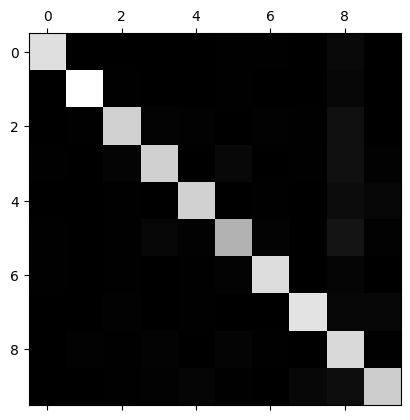

In [74]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [75]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

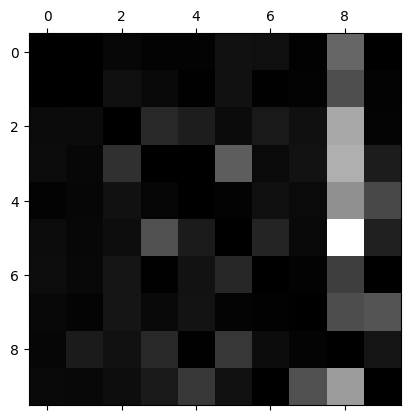

In [76]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.savefig("confusion_matrix_errors_plot")
plt.show()

In [77]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = plt.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [78]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = plt.cm.binary, **options)
    plt.axis("off")

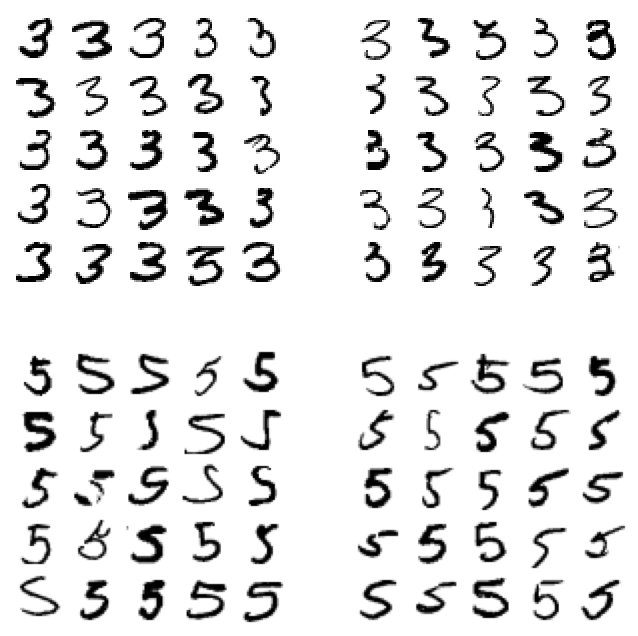

In [79]:
cl_a, cl_b = 3, 5
X_aa = data_train[(target_train == cl_a) & (target_train_pred == cl_a)]
X_ab = data_train[(target_train == cl_a) & (target_train_pred == cl_b)]
X_ba = data_train[(target_train == cl_b) & (target_train_pred == cl_a)]
X_bb = data_train[(target_train == cl_b) & (target_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.savefig("error_analysis_digits_plot")
plt.show()

In [80]:
from sklearn.neighbors import KNeighborsClassifier

target_train_large = (target_train >= 7)
target_train_odd = (target_train % 2 == 1)
target_multilabel = np.c_[target_train_large, target_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(data_train, target_multilabel)

KNeighborsClassifier()

In [81]:
noise = np.random.randint(0, 100, (len(data_train), 784))
data_train_mod = data_train + noise
noise = np.random.randint(0, 100, (len(data_test), 784))
data_test_mod = data_test + noise
target_train_mod = data_train
target_test_mod = data_test

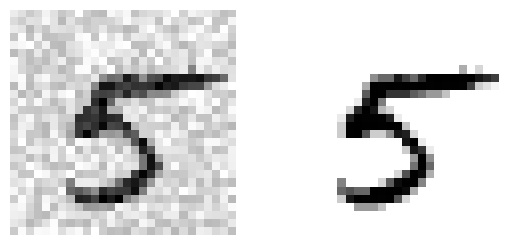

In [82]:
some_index = 5500
plt.subplot(121); plot_digit(data_test_mod[some_index])
plt.subplot(122); plot_digit(target_test_mod[some_index])
plt.savefig("noisy_digit_example_plot")
plt.show()